### ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

PLOTTING EP/LENGTH

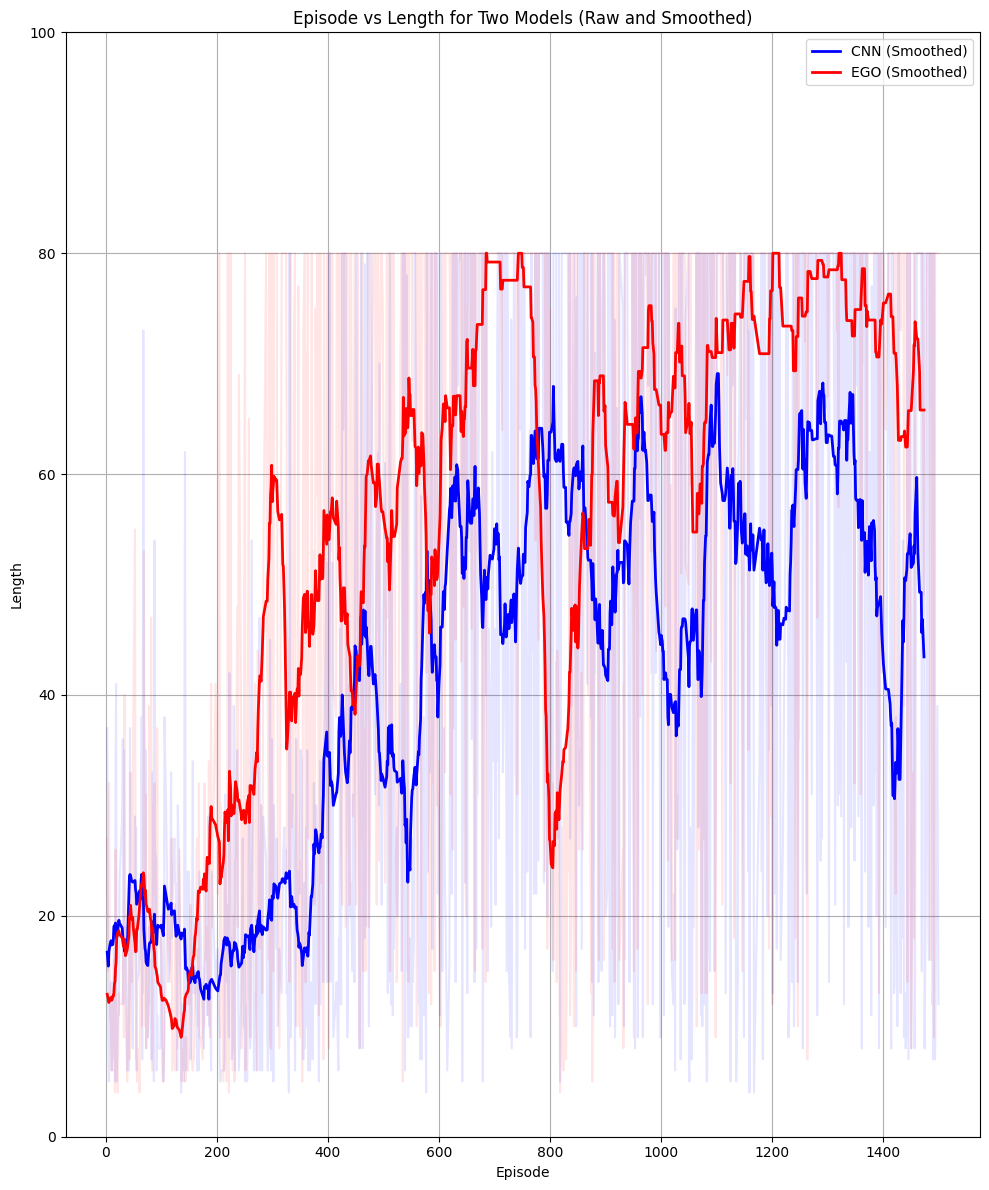

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load CSV files (replace 'file1.csv' and 'file2.csv' with your actual file names)
df1_length = pd.read_csv('cnnmorelayers_length.csv')  # CSV of episode lengths for CNN
df2_length = pd.read_csv('egolength.csv')  # CSV of episode lengths for EGO

# Extract the 'step' and 'value' columns for episode length data
step1_length = df1_length['Step']
value1_length = df1_length['Value']

step2_length = df2_length['Step']
value2_length = df2_length['Value']


# Function to apply moving average smoothing with a larger window size
def moving_average(data, window_size=20):  # Increased window size to 20 for more smoothing
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Apply smoothing to the 'value' data for lengths
smoothed_value1_length = moving_average(value1_length, window_size=20)  # Stronger smoothing for CNN length
smoothed_value2_length = moving_average(value2_length, window_size=20)  # Stronger smoothing for EGO length

# Apply the same step values (adjusting for the moving average)
smoothed_step1_length = step1_length[:len(smoothed_value1_length)]
smoothed_step2_length = step2_length[:len(smoothed_value2_length)]


# Plot the episode length data
plt.figure(figsize=(10, 12))

# First plot (Episode Lengths)
plt.plot(step1_length, value1_length, color='blue', alpha=0.1)  # Raw data with more opacity (no label for legend)
plt.plot(step2_length, value2_length, color='red', alpha=0.1)  # Raw data with more opacity (no label for legend)
plt.plot(smoothed_step1_length, smoothed_value1_length, label='CNN (Smoothed)', color='blue', linewidth=2)
plt.plot(smoothed_step2_length, smoothed_value2_length, label='EGO (Smoothed)', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Length')
plt.ylim(0,100)
plt.title('Episode vs Length for Two Models (Raw and Smoothed)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()



In [ ]:
# Load CSV files for episode rewards
df1_reward = pd.read_csv('CNN_ep_reward.csv')  # CSV of episode rewards for CNN
df2_reward = pd.read_csv('egoreward.csv')  # CSV of episode rewards for EGO

# Extract the 'step' and 'value' columns for episode reward data
step1_reward = df1_reward['Step']
value1_reward = df1_reward['Value']

step2_reward = df2_reward['Step']
value2_reward = df2_reward['Value']

# Apply smoothing to the 'value' data for rewards
smoothed_value1_reward = moving_average(value1_reward, window_size=20)  # Stronger smoothing for CNN reward
smoothed_value2_reward = moving_average(value2_reward, window_size=20)  # Stronger smoothing for EGO reward

smoothed_step1_reward = step1_reward[:len(smoothed_value1_reward)]
smoothed_step2_reward = step2_reward[:len(smoothed_value2_reward)]

# Plot the episode length data
plt.figure(figsize=(10, 12))


# Second plot (Episode Rewards)
plt.plot(step1_reward, value1_reward, color='blue', alpha=0.1)  # Raw data with more opacity (no label for legend)
plt.plot(step2_reward, value2_reward, color='red', alpha=0.1)  # Raw data with more opacity (no label for legend)
plt.plot(smoothed_step1_reward, smoothed_value1_reward, label='CNN (Smoothed)', color='blue', linewidth=2)
plt.plot(smoothed_step2_reward, smoothed_value2_reward, label='EGO (Smoothed)', color='red', linewidth=2)

# Add labels and title
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Episode vs Reward for Two Models (Raw and Smoothed)')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


SUCCESS RATE

In [12]:
# Load CSV files (replace 'file1.csv' and 'file2.csv' with your actual file names)
df1_length = pd.read_csv('CNN_ep_length.csv')  # CSV of episode lengths for CNN
df2_length = pd.read_csv('egolength.csv')  # CSV of episode lengths for EGO

# Extract the 'step' and 'value' columns for episode length data
step1_length = df1_length['Step']
value1_length = df1_length['Value']

step2_length = df2_length['Step']
value2_length = df2_length['Value']

rate_cnn = sum(value >= 15 for value in value1_length) / len(value1_length)
rate_ego = sum(value >= 15 for value in value2_length) / len(value2_length)

print("Success rate of CNN:",rate_cnn)
print("Success rate of EGO:", rate_ego)



Success rate of CNN: 0.691
Success rate of EGO: 0.862
